# Regression Model

## Overview

## Load data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pprint
%load_ext autoreload
from scipy import stats
from pylab import rcParams

In [2]:
status_2015 = pd.read_csv('~/Code/bikesupply/data/test_data/status_may15.csv', parse_dates = ['time'])
status_2016 = pd.read_csv('~/Code/bikesupply/data/test_data/status_may16.csv', parse_dates = ['time'])

In [3]:
status_2015 = status_2015.set_index('time')
status_2015['hour'] = [ts.hour for ts in status_2015.index]
status_2015['weekday'] = [ts.weekday() for ts in status_2015.index]
means_2015 = status_2015.groupby(['weekday','station_id','hour']).mean()

In [4]:
status_2016['hour'] = status_2016.time.dt.hour
status_2016['weekday'] = status_2016.time.dt.weekday
status_2016['day'] = status_2016.time.dt.day
means_2016 = status_2016.groupby(['day', 'weekday', 'station_id','hour']).mean()

In [5]:
means_2015 = means_2015.reset_index()
means_2016 = means_2016.reset_index()

In [6]:
merged_df = pd.merge(means_2015, means_2016, on = ['weekday', 'station_id', 'hour'])

In [7]:
merged_df.rename(columns={'bikes_available_x': 'bikes_predicted', 'docks_available_x': 'docks_predicted', 'bikes_available_y': 'bikes_actual', 'docks_available_y': 'docks_actual'}, inplace=True)

In [8]:
merged_df["day_in_hours"] = merged_df['day'] * 24

In [9]:
merged_df["day-hour"] = merged_df["day_in_hours"] + merged_df["hour"]

## Station Flow Variance

In [10]:
station_ten_day_one = merged_df[(merged_df['station_id'] == 10) & (merged_df['day'] == 1)]
station_thirty_day_one = merged_df[(merged_df['station_id'] == 30) & (merged_df['day'] == 1)]
station_fifty_day_one = merged_df[(merged_df['station_id'] == 50) & (merged_df['day'] == 1)]
station_sixty_day_one = merged_df[(merged_df['station_id'] == 60) & (merged_df['day'] == 1)]
station_seventy_day_one = merged_df[(merged_df['station_id'] == 70) & (merged_df['day'] == 1)]

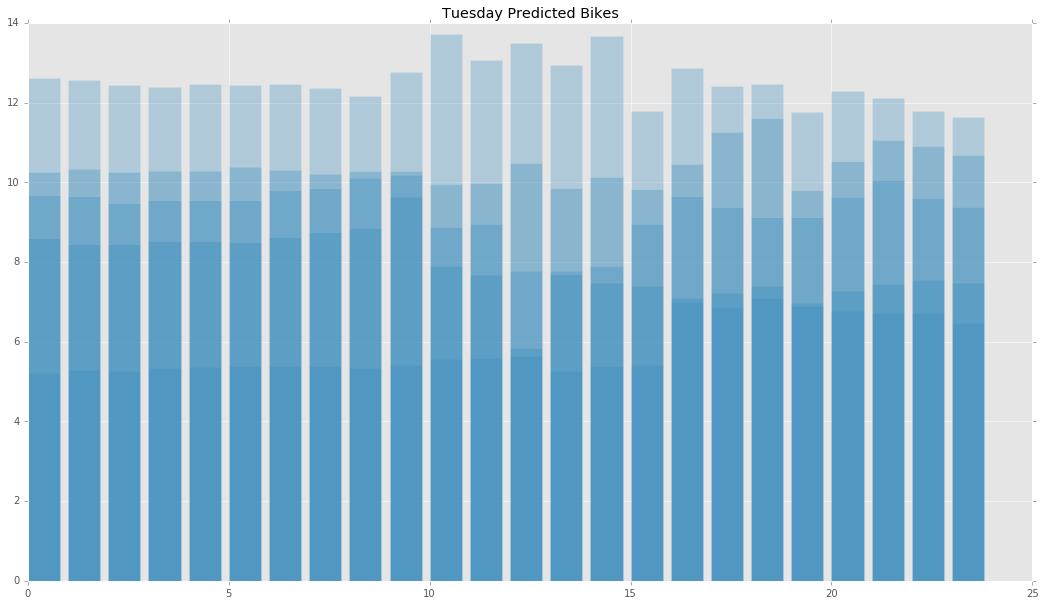

In [11]:
# Day 1 - Multiple stations

rcParams['figure.figsize'] =  18, 10

X = station_seventy_day_one['hour']
ten = station_ten_day_one['bikes_predicted']
thirty = station_thirty_day_one['bikes_predicted']
fifty = station_fifty_day_one['bikes_predicted']
sixty = station_sixty_day_one['bikes_predicted']
seventy = station_seventy_day_one['bikes_predicted']

plt.bar(X, ten, alpha = 0.3)
plt.bar(X, thirty, alpha = 0.3)
plt.bar(X, fifty, alpha = 0.3)
plt.bar(X, sixty,  alpha = 0.3)
plt.bar(X, seventy, alpha = 0.3)

import matplotlib.patches as mpatches

plt.title("Tuesday Predicted Bikes")


In [12]:
# Day 6 - Multiple Stations

In [13]:
station_ten_day_six = merged_df[(merged_df['station_id'] == 10) & (merged_df['day'] == 6)]
station_thirty_day_six = merged_df[(merged_df['station_id'] == 30) & (merged_df['day'] == 6)]
station_fifty_day_six = merged_df[(merged_df['station_id'] == 50) & (merged_df['day'] == 6)]
station_sixty_day_six = merged_df[(merged_df['station_id'] == 60) & (merged_df['day'] == 6)]
station_seventy_day_six = merged_df[(merged_df['station_id'] == 70) & (merged_df['day'] == 6)]

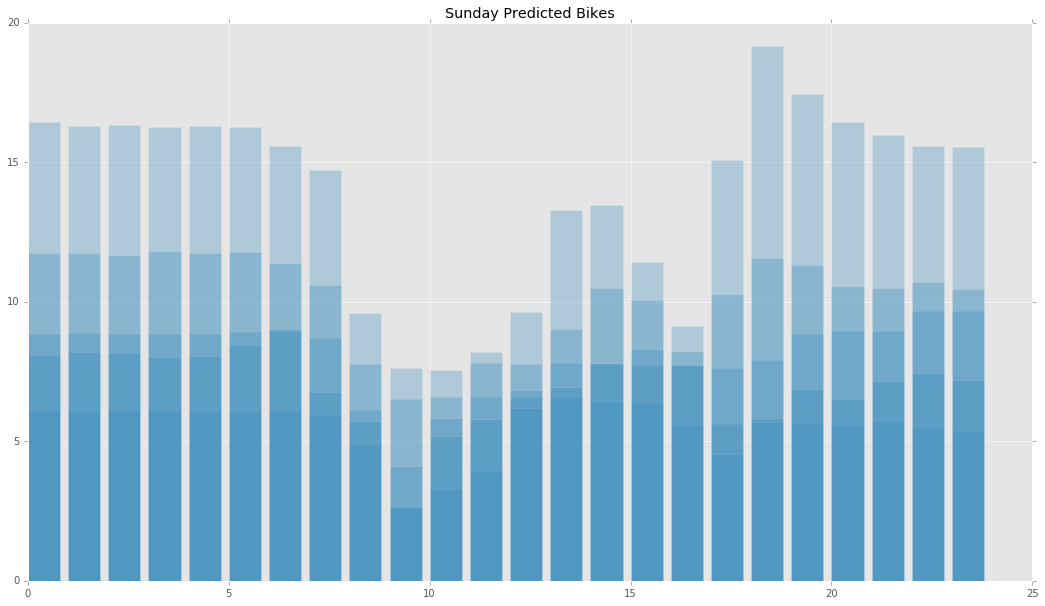

In [14]:
# Day 6 - Multiple stations

rcParams['figure.figsize'] =  18, 10

X = station_seventy_day_six['hour']
ten = station_ten_day_six['bikes_predicted']
thirty = station_thirty_day_six['bikes_predicted']
fifty = station_fifty_day_six['bikes_predicted']
sixty = station_sixty_day_six['bikes_predicted']
seventy = station_seventy_day_six['bikes_predicted']

plt.bar(X, ten, alpha = 0.3)
plt.bar(X, thirty, alpha = 0.3)
plt.bar(X, fifty, alpha = 0.3)
plt.bar(X, sixty,  alpha = 0.3)
plt.bar(X, seventy, alpha = 0.3)

import matplotlib.patches as mpatches

plt.title("Sunday Predicted Bikes")


Given the supply variance across stations and between weeekdays and weekends, I'm motivated to begin by creating two regressions for each station - weekend and weekday. The task now is to do this programatically. 

Sometimes a linear regression seems appropriate, and other times a quadratic regression would be a better fit. How should we determine the number of coeffients. One per hour of the day? Three points (early morning, mid-day, night) to supply enough data to capture the quadratic curves we are witnessing?

## Polynomial regression

In [19]:
station_seventy_day_two = merged_df[(merged_df['station_id'] == 70) & (merged_df['day'] == 2)]

### Numpy polyfit

In [20]:
def polynomial_predictions(X, Y):
    z = np.poly1d(np.polyfit(X,Y,2))
    values = []
    for i in range(0,24):
        values.append(z(i))
    return values    

In [21]:
X = station_seventy_day_two['hour']
Y = station_seventy_day_two['bikes_predicted']

In [22]:
station_seventy_polyfit_values = polynomial_predictions(X, Y)

In [23]:
station_seventy_polyfit_values

[12.630174679487176,
 11.559333821070231,
 10.58018781671227,
 9.6927366664132926,
 8.896980370173301,
 8.1929189279922952,
 7.5805523398702714,
 7.0598806058072325,
 6.6309037258031793,
 6.2936216998581092,
 6.0480345279720247,
 5.894142210144925,
 5.8319447463768084,
 5.8614421366676774,
 5.9826343810175313,
 6.1955214794263682,
 6.5001034318941908,
 6.8963802384209982,
 7.3843518990067878,
 7.9640184136515648,
 8.6353797823553258,
 9.398436005118068,
 10.253187081939801,
 11.199633012820513]

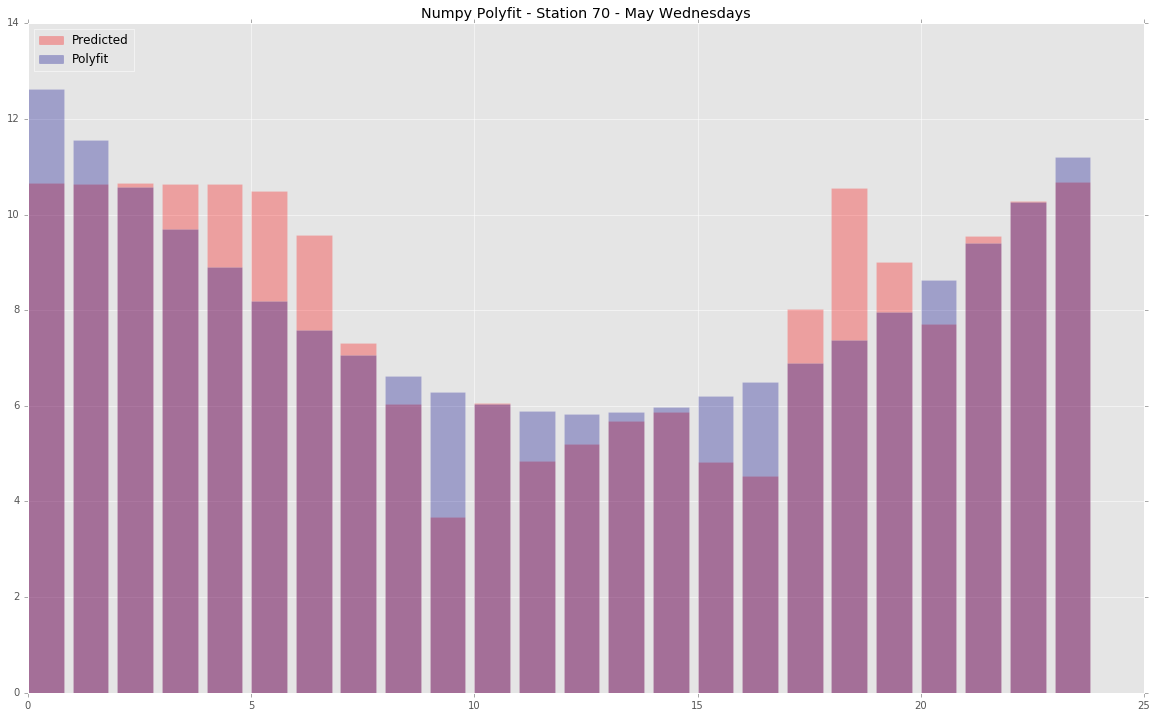

In [24]:
# Day 1 Polyfit

rcParams['figure.figsize'] =  20, 12

X = station_seventy_day_two['hour']
predicted = station_seventy_day_two['bikes_predicted']
polyfit = station_seventy_polyfit_values

plt.bar(X, predicted, color = 'red', alpha = 0.3)
plt.bar(X, polyfit, color = 'darkblue', alpha = 0.3)

import matplotlib.patches as mpatches

plt.title("Numpy Polyfit - Station 70 - May Wednesdays")

predicted = mpatches.Patch(color='red', label='Predicted', alpha = 0.3)
polyfit = mpatches.Patch(color='darkblue', label='Polyfit', alpha = 0.3)
plt.legend(handles=[predicted, polyfit], loc=2)


In [25]:
X = range(0,24)
Y1 = station_seventy_day_six['bikes_predicted']

In [26]:
station_seventy_polyfit_day_six = polynomial_predictions(X, Y1)

AttributeError: 'Series' object has no attribute 'get_label'

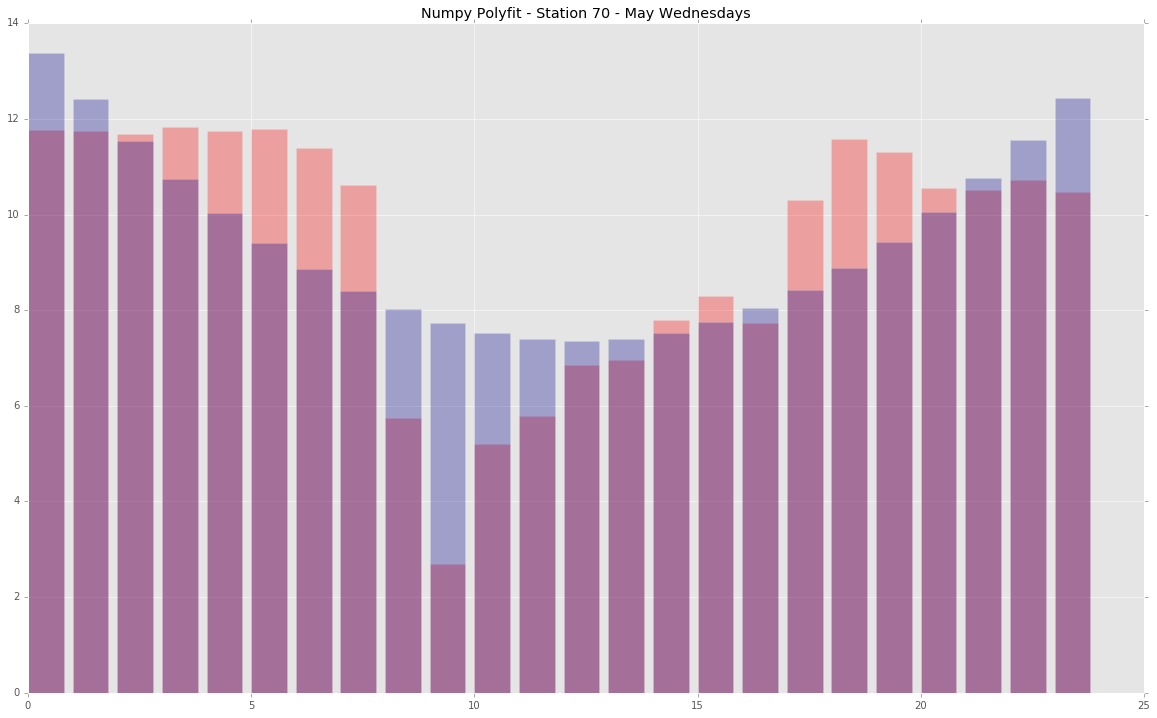

In [31]:
# Day 1 Polyfit

rcParams['figure.figsize'] =  20, 12

predicted = station_seventy_day_six['bikes_predicted']
polyfit = station_seventy_polyfit_day_six

plt.bar(X, predicted, color = 'red', alpha = 0.3)
plt.bar(X, polyfit, color = 'darkblue', alpha = 0.3)

import matplotlib.patches as mpatches

plt.title("Numpy Polyfit - Station 70 - May Wednesdays")

pred = mpatches.Patch(color='red', label='Predicted', alpha = 0.3)
poly = mpatches.Patch(color='darkblue', label='Polyfit', alpha = 0.3)
plt.legend(handles=[predicted, polyfit1], loc=2)

In [33]:
len(polyfit)

24

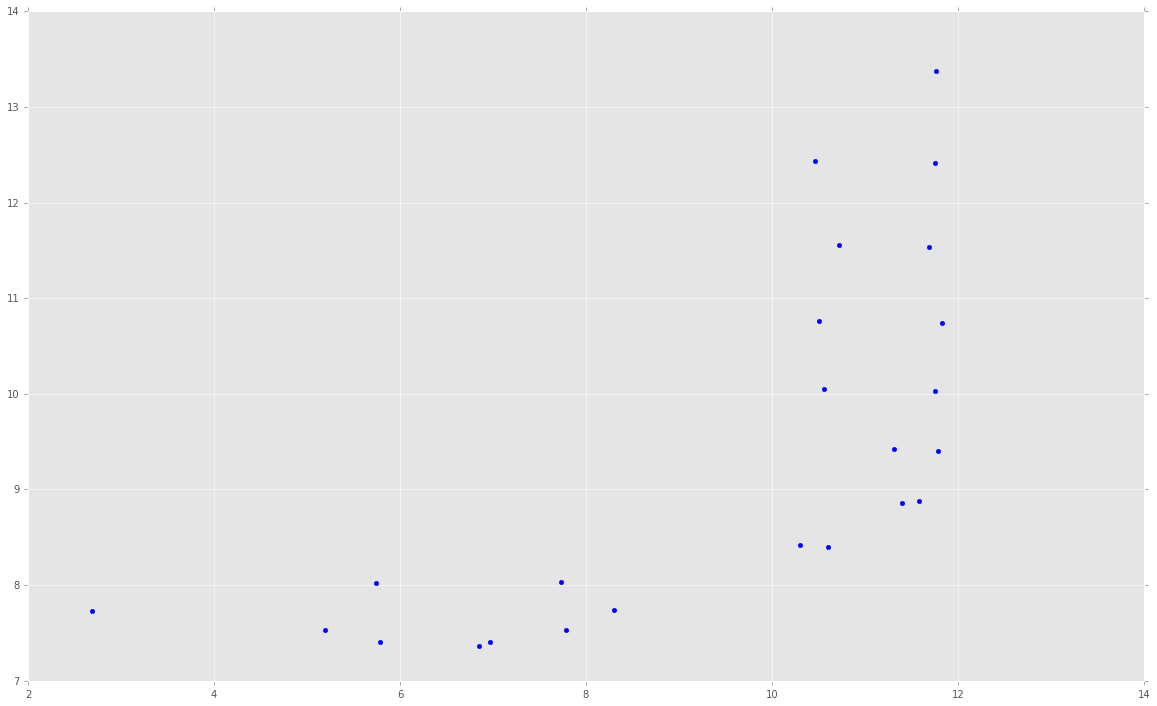

In [37]:
plt.scatter( predicted , polyfit, marker="o", color="b")

This is what we'd expect to see in a curve fitting - a function that reduceds the mean difference between estimations and observed data (some over estimated, some under). 

But will this regression make for better predictions than our historical daily averages?

## GLM

In [45]:
from pymc3 import  *

In [47]:
data = dict(x=predicted, y=polyfit)

In [48]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.glm('y ~ x', data)
    start = find_MAP()
    step = NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = sample(2000, step, progressbar=False) # draw 2000 posterior samples using NUTS sampling

Optimization terminated successfully.
         Current function value: 72.280550
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22


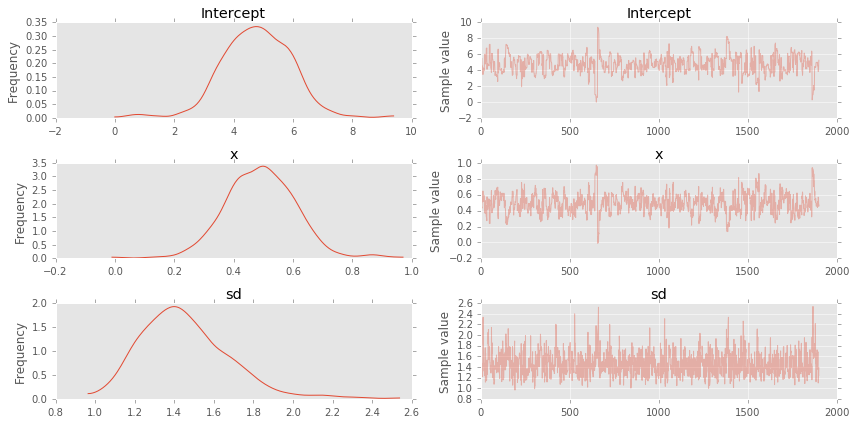

In [49]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

In [78]:
true_intercept = 5
true_slope = .55
true_regression_line = true_intercept + true_slope * predicted

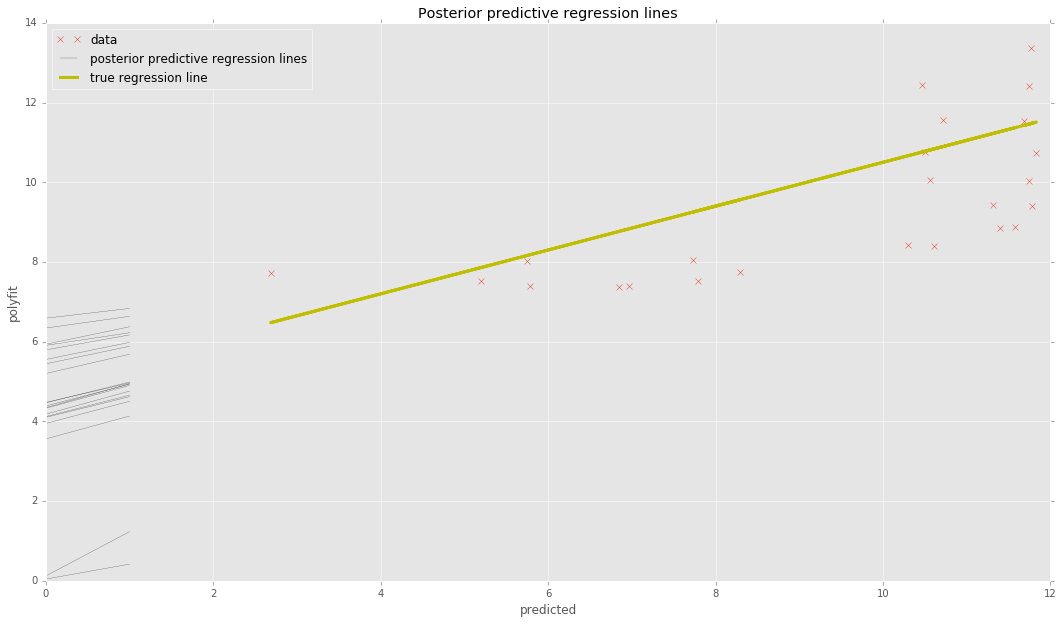

In [79]:
plt.figure(figsize=(18, 10))
plt.plot(predicted, polyfit, 'x', label='data')
glm.plot_posterior_predictive(trace, samples=20, label='posterior predictive regression lines')
plt.plot(predicted, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('predicted')
plt.ylabel('polyfit');

## Validation - Station 2 (May)

In [39]:
station_two = merged_df[(merged_df['station_id'] == 2)]

In [40]:
means_all_days = station_two.groupby(['weekday', 'hour']).mean()

In [41]:
def polynomial_predictions(Y):
    x = range(0, 24)
    return np.poly1d(np.polyfit(x,Y,2))

def set_polyfit(row):
    row['polyfit'] = predictors[int(row['weekday'])](row['bikes_predicted'])
    return row

In [42]:
predictors = []
for i in range(0,7):
    predictors.append(
        polynomial_predictions(means_all_days.query('weekday == @i')['bikes_predicted'])
    )

station_two = station_two.apply(set_polyfit, axis=1)

In [43]:
from sklearn.metrics import mean_squared_error
y_true = station_two['bikes_actual']
y_pred = station_two['polyfit']
print "STATION 2 (May) POLYFIT - Mean Squared Error:", mean_squared_error(y_true, y_pred)

STATION 2 (May) POLYFIT - Mean Squared Error: 20.3364393939


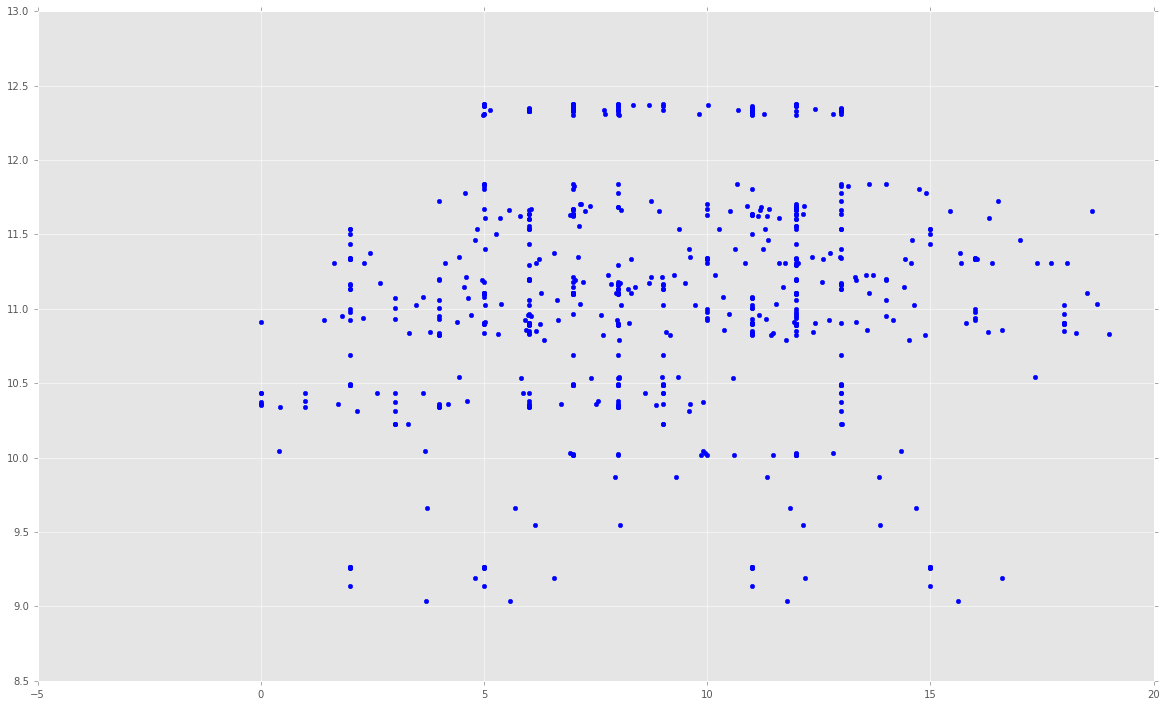

In [44]:
plt.scatter( y_true , y_pred , marker="o", color="b")